The MNIST database (taken from NIST: National Institute of Standards and Technology) of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Four files are available on this site:

train-images-idx3-ubyte.gz:  training set images (9912422 bytes)

train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)

t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)

t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

First wee will import all the stuff we need, which will initialize Keras as a side effect:

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We will convert the data into the format TensorFlow expects so divide the image data by 255 in order to normalize it into 0-1 range. After converting it into floating point values.

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Now we will convert the 0-9 labels into "one-hot" format.

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Let's make sure if it looks OK

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


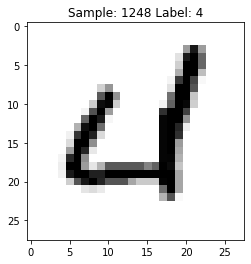

In [21]:
import matplotlib.pyplot as plt

def display_sample(num) :
  print(train_labels[num])
  label = train_labels[num].argmax(axis = 0)
  image = train_images[num].reshape([28,28])
  plt.title('Sample: %d Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

display_sample(1248)

We can set up the input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied.

In [22]:
model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Thanks to Keras which gives us the option RMSProp optimizer to set it up simplest way. 

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training the model. (30 epoches with a batch size of 100.)

In [25]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=30,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/30
600/600 - 6s - loss: 0.2428 - accuracy: 0.9293 - val_loss: 0.1200 - val_accuracy: 0.9655
Epoch 2/30
600/600 - 5s - loss: 0.0986 - accuracy: 0.9702 - val_loss: 0.0792 - val_accuracy: 0.9765
Epoch 3/30
600/600 - 5s - loss: 0.0655 - accuracy: 0.9802 - val_loss: 0.0698 - val_accuracy: 0.9792
Epoch 4/30
600/600 - 5s - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0671 - val_accuracy: 0.9803
Epoch 5/30
600/600 - 5s - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0632 - val_accuracy: 0.9802
Epoch 6/30
600/600 - 5s - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0631 - val_accuracy: 0.9814
Epoch 7/30
600/600 - 5s - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0677 - val_accuracy: 0.9816
Epoch 8/30
600/600 - 5s - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0653 - val_accuracy: 0.9827
Epoch 9/30
600/600 - 5s - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0693 - val_accuracy: 0.9828
Epoch 10/30
600/600 - 5s - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0691 - val_accuracy: 0.9821

In [26]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13248273730278015
Test accuracy: 0.9824000000953674


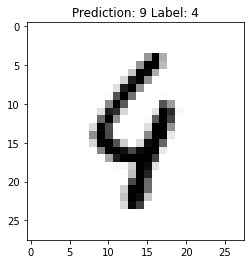

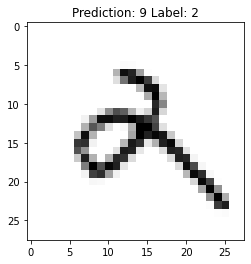

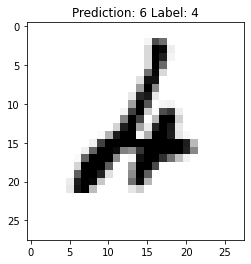

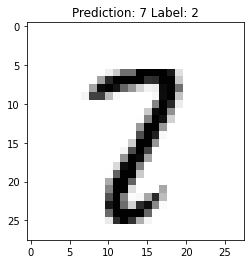

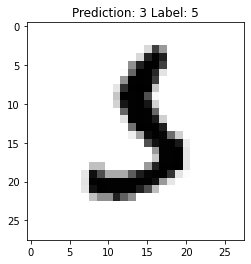

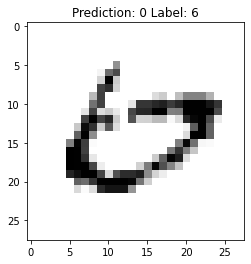

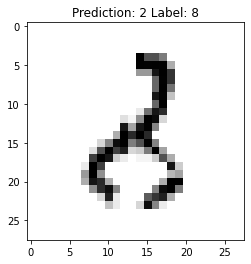

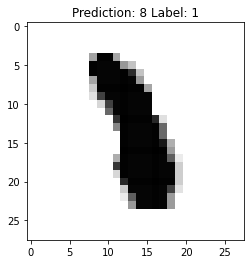

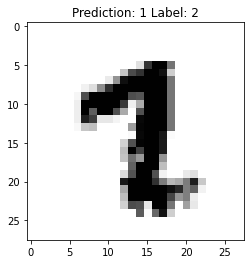

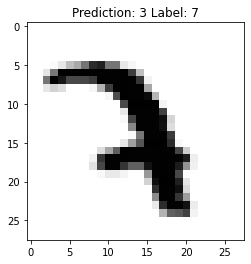

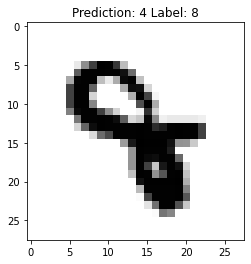

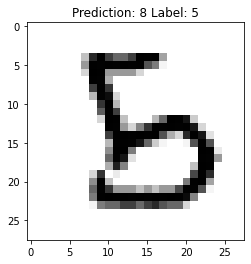

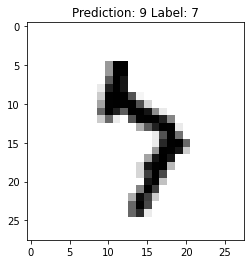

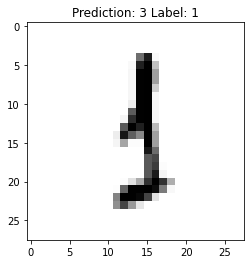

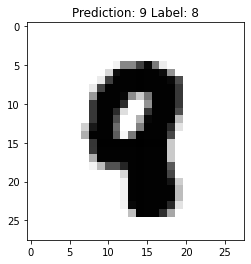

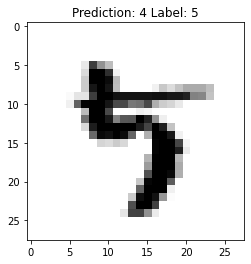

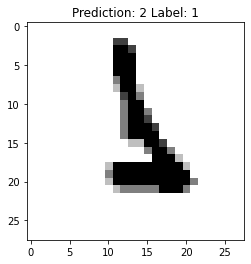

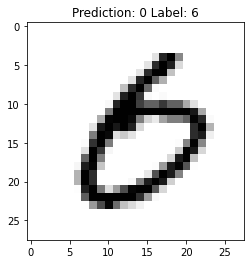

In [27]:
for x in range(1000):
  test_image = test_images[x,:].reshape(1,784)
  predicted_cat = model.predict(test_image).argmax()
  label = test_labels[x].argmax()
  if (predicted_cat != label):
    plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

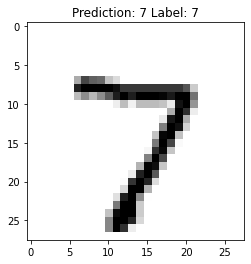

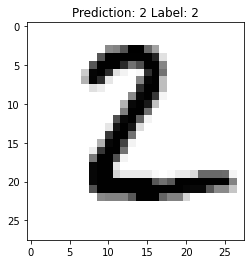

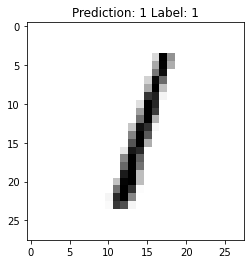

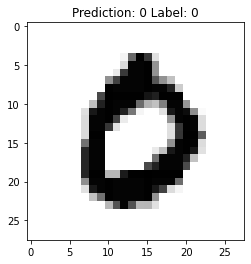

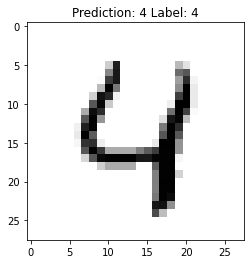

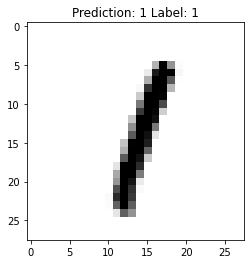

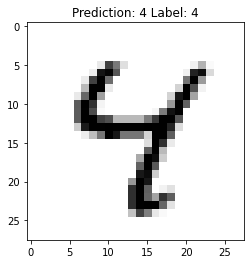

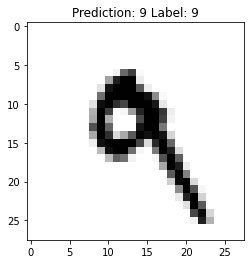

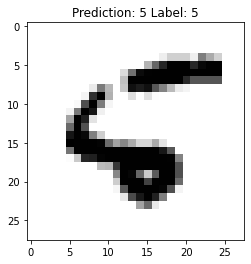

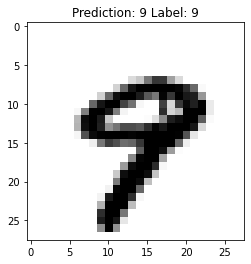

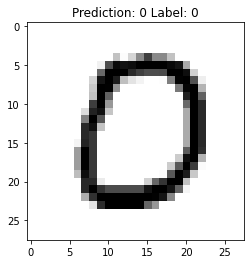

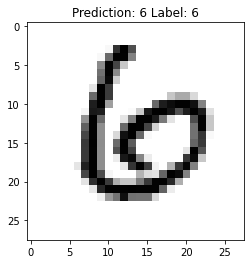

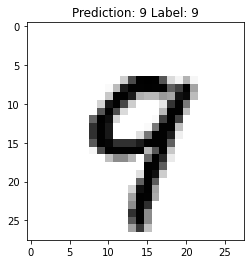

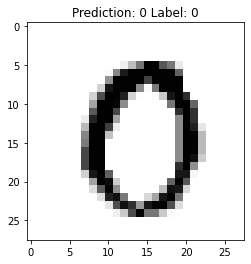

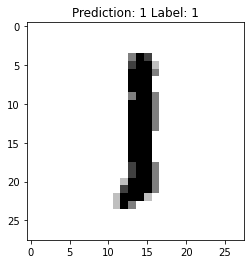

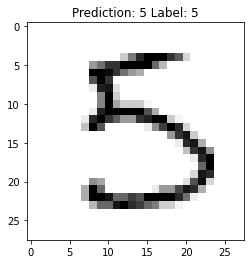

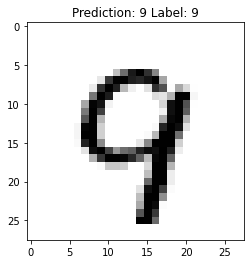

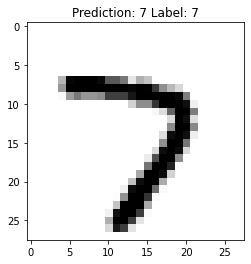

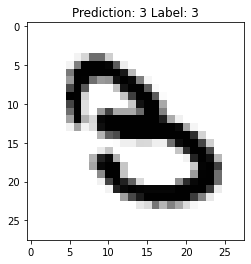

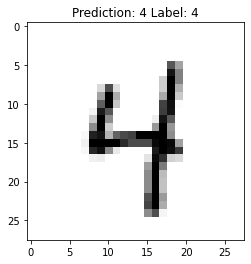

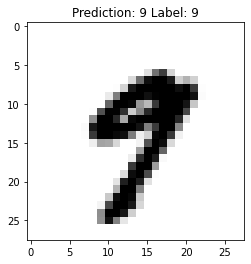

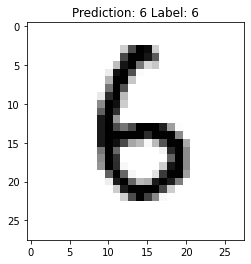

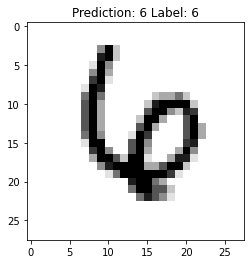

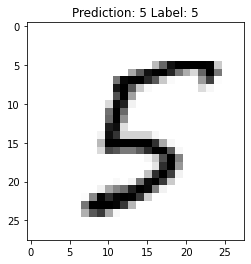

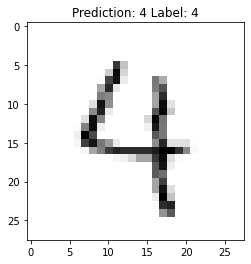

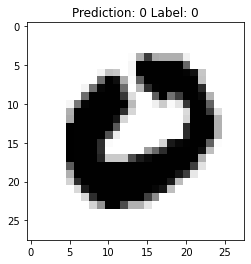

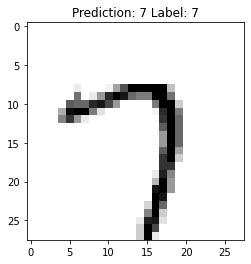

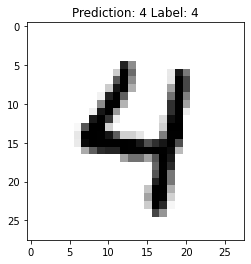

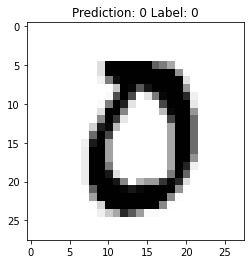

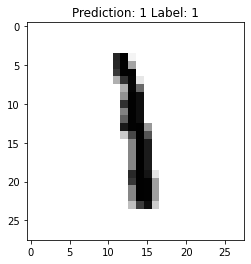

In [28]:
for x in range(30):
  test_image = test_images[x,:].reshape(1,784)
  predicted_cat = model.predict(test_image).argmax()
  label = test_labels[x].argmax()
  if (predicted_cat == label):
    plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()